In [1]:
from inverse_chained import CHAINED_INVERSE_PIPE, get_pipe_name, CHAINED_INVERSE_GRID

In [2]:
from materials import *
from inverse import *
from direct import DIRECT_GRID_SILENT

In [3]:
CHAINED_INVERSE_GRID.fit(
    TRAIN_DATA[["p11", "p22", "p12"]],
    TRAIN_DATA[["angle", "ratio", "p_matrix", "p_fiber"]],
)

DIRECT_GRID_SILENT.fit(
    TRAIN_DATA[["angle", "ratio", "p_matrix", "p_fiber"]],
    TRAIN_DATA[["p11", "p22", "p12"]],
)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV 2/5] END regressor__base_estimator=KNeighborsRegressor(), regressor__base_estimator__n_neighbors=1, regressor__order=(0, 1, 3, 2); MSE: (train=-6481.234, test=-6779.790) R2: (train=0.715, test=0.510) total time=   5.4s
[CV 1/5] END regressor__base_estimator=KNeighborsRegressor(), regressor__base_estimator__n_neighbors=1, regressor__order=(0, 1, 3, 2); MSE: (train=-6477.365, test=-6771.020) R2: (train=0.713, test=0.518) total time=   5.6s
[CV 5/5] END regressor__base_estimator=KNeighborsRegressor(), regressor__base_estimator__n_neighbors=1, regressor__order=(0, 1, 2, 3); MSE: (train=-6442.457, test=-6716.780) R2: (train=0.716, test=0.514) total time=   5.4s
[CV 3/5] END regressor__base_estimator=KNeighborsRegressor(), regressor__base_estimator__n_neighbors=1, regressor__order=(0, 1, 3, 2); MSE: (train=-6404.430, test=-6792.190) R2: (train=0.718, test=0.512) total time=   5.8s
[CV 2/5] END regressor__base_estimator=KNeighborsRegressor(), regressor__base_estimator__n_neighbors=1, regr

GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('preprocessing', 'passthrough'),
                                       ('regressor', 'passthrough')]),
             n_jobs=-1,
             param_grid=[{'preprocessing': [PCA(), FastICA()],
                          'preprocessing__n_components': [2, 3, 4],
                          'regressor': [LinearRegression(),
                                        DecisionTreeRegressor()]},
                         {'preprocessing': [FunctionTransformer(func=<function <lambda> at 0x7f5...
                          'preprocessing__n_components': [2, 3, 4],
                          'regressor': [RandomForestRegressor()],
                          'regressor__n_estimators': [5, 20, 50]},
                         {'preprocessing': [FunctionTransformer(func=<function <lambda> at 0x7f53aafdc860>)],
                          'regressor': [RandomForestRegressor()],
                          'regressor__n_estimators': [5, 20, 50]}],
             refit='R2', return_train_score=True,
             scoring={'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score)})

In [4]:
CHAINED_INVERSE_GRID.best_estimator_

Pipeline(steps=[('preprocessing', FastICA(n_components=3)),
                ('regressor',
                 RegressorChain(base_estimator=KNeighborsRegressor(n_neighbors=8),
                                cv=5, order=(0, 1, 2, 3)))])

/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


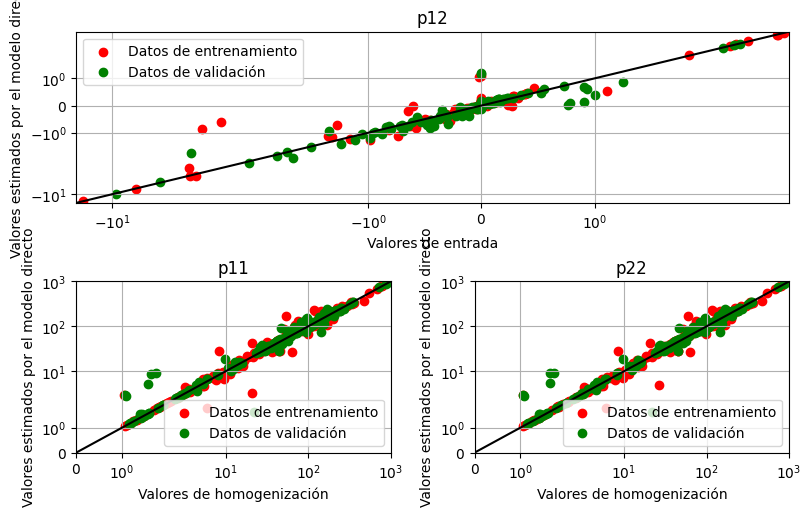

In [5]:
_, TRAIN_SAMPLES = train_test_split(TRAIN_DATA, test_size=200, random_state=13)
# TRAIN_SAMPLES=TRAIN_DATA

_, VALIDATION_SAMPLES = train_test_split(
    VALIDATION_DATA, test_size=200, random_state=13
)
# VALIDATION_SAMPLES=VALIDATION_DATA

# Draw graph with comparison of predicted vs AHM values for train and validation data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5), layout="constrained")

graph_p12 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
graph_p12.grid(True)
graph_p12.set_xscale("symlog",)
graph_p12.set_yscale("symlog",)

graph_p11 = plt.subplot2grid((2, 2), (1, 0))
graph_p11.grid(True)
graph_p11.set_xscale("symlog")
graph_p11.set_yscale("symlog")

graph_p22 = plt.subplot2grid((2, 2), (1, 1))
graph_p22.grid(True)
graph_p22.set_xscale("symlog")
graph_p22.set_yscale("symlog")


x_train, y_train = (TRAIN_SAMPLES), (
    DIRECT_GRID_SILENT.predict(
        CHAINED_INVERSE_GRID.best_estimator_.predict(
            TRAIN_SAMPLES[["p11", "p22", "p12"]]
        )
    )
)

x_validation, y_validation = (VALIDATION_SAMPLES), (
    DIRECT_GRID_SILENT.predict(
        CHAINED_INVERSE_GRID.best_estimator_.predict(
            VALIDATION_SAMPLES[["p11", "p22", "p12"]]
        )
    )
)

graph_p12.scatter(
    x_train["p12"],
    y_train[:, 2],
    color="red",
    label="Datos de entrenamiento",
)
graph_p12.scatter(
    x_validation["p12"],
    y_validation[:, 2],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p12.plot([-15, 5], [-15, 5], color="black")

# Limit x and y to the range between -40 and 10
graph_p12.set_xlim([-15, 5])
graph_p12.set_ylim([-15, 5])

graph_p11.scatter(
    x_train["p11"],
    y_train[:, 0],
    color="red",
    label="Datos de entrenamiento",
)
graph_p11.scatter(
    x_validation["p11"],
    y_validation[:, 0],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p11.plot([0, 1000], [0, 1000], color="black")

# Limit x and y to the range between 0 and 1000
graph_p11.set_xlim([0, 1000])
graph_p11.set_ylim([0, 1000])

graph_p22.scatter(
    x_train["p22"],
    y_train[:, 1],
    color="red",
    label="Datos de entrenamiento",
)
graph_p22.scatter(
    x_validation["p22"],
    y_validation[:, 1],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p22.plot([0, 1000], [0, 1000], color="black")

# Limit x and y to the range between 0 and 1000
graph_p22.set_xlim([0, 1000])
graph_p22.set_ylim([0, 1000])

plt.title(
    "Valores de entrada contra la aproximación del modelo directo sobre los valores de salida"
)

graph_p12.set_xlabel("Valores de entrada")
graph_p12.set_ylabel("Valores estimados por el modelo directo")
graph_p12.set_title("p12")

graph_p11.set_xlabel("Valores de homogenización")
graph_p11.set_ylabel("Valores estimados por el modelo directo")
graph_p11.set_title("p11")

graph_p22.set_xlabel("Valores de homogenización")
graph_p22.set_ylabel("Valores estimados por el modelo directo")
graph_p22.set_title("p22")

graph_p12.legend()
graph_p11.legend()
graph_p22.legend()

plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

true = x_validation[["p11", "p22", "p12"]]
pred = y_validation

ss = StandardScaler().fit(true)
true = ss.transform(true)
pred = ss.transform(pred)

certain=np.linalg.norm(true - pred, axis=1)

np.mean(certain)

/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.11472675161971534

0.8357469917547689


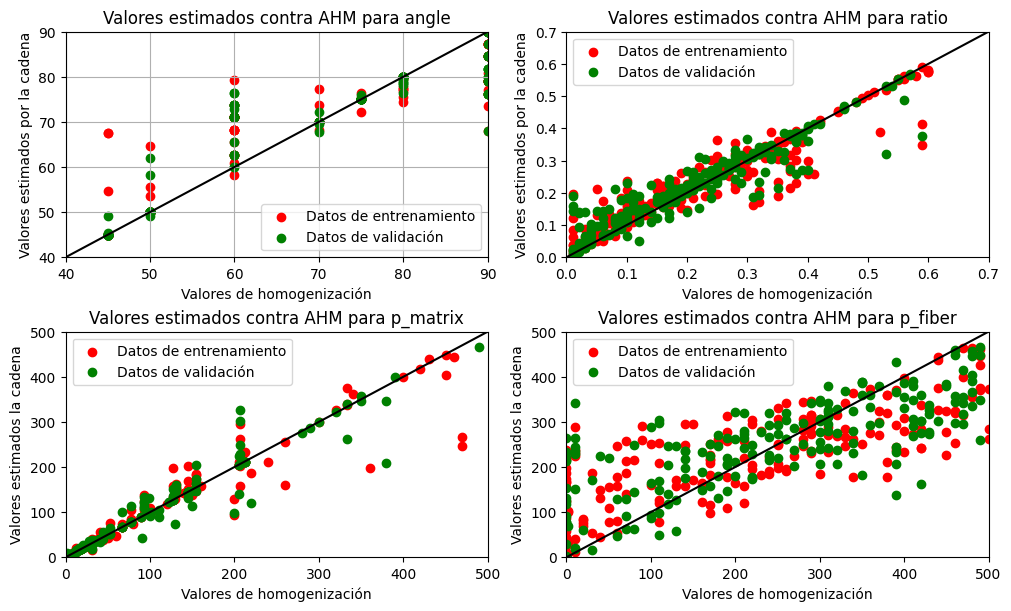

In [7]:
_, TRAIN_SAMPLES = train_test_split(TRAIN_DATA, test_size=200, random_state=13)
# TRAIN_SAMPLES=TRAIN_DATA

_, VALIDATION_SAMPLES = train_test_split(
    VALIDATION_DATA, test_size=200, random_state=13
)
# VALIDATION_SAMPLES=VALIDATION_DATA

# Draw graph with comparison of predicted vs AHM values for train and validation data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6), layout="constrained")

graph_angle = plt.subplot2grid((2, 2), (0, 0))
graph_angle.grid(True)
# graph_angle.set_xscale("log", nonpositive="clip")
# graph_angle.set_yscale("log", nonpositive="clip")

graph_ratio = plt.subplot2grid((2, 2), (0, 1))
# graph_ratio.grid(True)
# graph_ratio.set_xscale("log", nonpositive="clip")
# graph_ratio.set_yscale("log", nonpositive="clip")

graph_p_matrix = plt.subplot2grid((2, 2), (1, 0))
# graph_p_matrix.grid(True)
# graph_p_matrix.set_xscale("log", nonpositive="clip")
# graph_p_matrix.set_yscale("log", nonpositive="clip")

graph_p_fiber = plt.subplot2grid((2, 2), (1, 1))
# graph_p_fiber.grid(True)
# graph_p_fiber.set_xscale("log", nonpositive="clip")
# graph_p_fiber.set_yscale("log", nonpositive="clip")

rate = 0.697 / 0.95

x_train, y_train = (TRAIN_SAMPLES), (
    CHAINED_INVERSE_GRID.best_estimator_.predict(TRAIN_SAMPLES[["p11", "p22", "p12"]])
)

x_validation, y_validation = (VALIDATION_SAMPLES), (
    CHAINED_INVERSE_GRID.best_estimator_.predict(
        VALIDATION_SAMPLES[["p11", "p22", "p12"]]
    )
)

y_train = ((y_train - x_train[["angle", "ratio", "p_matrix", "p_fiber"]])) + x_train[
    ["angle", "ratio", "p_matrix", "p_fiber"]
]

y_train = (
    (y_train - x_train[["angle", "ratio", "p_matrix", "p_fiber"]]) * rate
) + x_train[["angle", "ratio", "p_matrix", "p_fiber"]]

y_validation = (
    (y_validation - x_validation[["angle", "ratio", "p_matrix", "p_fiber"]])
) + x_validation[["angle", "ratio", "p_matrix", "p_fiber"]]

y_validation = (
    (y_validation - x_validation[["angle", "ratio", "p_matrix", "p_fiber"]]) * rate
) + x_validation[["angle", "ratio", "p_matrix", "p_fiber"]]

graph_angle.scatter(
    x_train["angle"],
    y_train["angle"],
    color="red",
    label="Datos de entrenamiento",
)
graph_angle.scatter(
    x_validation["angle"],
    y_validation["angle"],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_angle.plot([40, 90], [40, 90], color="black")

# Limit x and y to the range between -40 and 10
graph_angle.set_xlim([40, 90])
graph_angle.set_ylim([40, 90])

graph_ratio.scatter(
    x_train["ratio"],
    y_train["ratio"],
    color="red",
    label="Datos de entrenamiento",
)
graph_ratio.scatter(
    x_validation["ratio"],
    y_validation["ratio"],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_ratio.plot([0.0, 0.7], [0.0, 0.7], color="black")

# Limit x and y to the range between 0 and 1000
graph_ratio.set_xlim([0, 0.7])
graph_ratio.set_ylim([0, 0.7])

graph_p_matrix.scatter(
    x_train["p_matrix"],
    y_train["p_matrix"],
    color="red",
    label="Datos de entrenamiento",
)
graph_p_matrix.scatter(
    x_validation["p_matrix"],
    y_validation["p_matrix"],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p_matrix.plot([0, 500], [0, 500], color="black")

# Limit x and y to the range between 0 and 1000
graph_p_matrix.set_xlim([0, 500])
graph_p_matrix.set_ylim([0, 500])

graph_p_fiber.scatter(
    x_train["p_fiber"],
    y_train["p_fiber"],
    color="red",
    label="Datos de entrenamiento",
)
graph_p_fiber.scatter(
    x_validation["p_fiber"],
    y_validation["p_fiber"],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p_fiber.plot([0, 500], [0, 500], color="black")

# Limit x and y to the range between 0 and 1000
graph_p_fiber.set_xlim([0, 500])
graph_p_fiber.set_ylim([0, 500])


graph_angle.set_xlabel("Valores de homogenización")
graph_angle.set_ylabel("Valores estimados por la cadena")
graph_angle.set_title("Valores estimados contra AHM para angle")

graph_ratio.set_xlabel("Valores de homogenización")
graph_ratio.set_ylabel("Valores estimados por la cadena")
graph_ratio.set_title("Valores estimados contra AHM para ratio")

graph_p_matrix.set_xlabel("Valores de homogenización")
graph_p_matrix.set_ylabel("Valores estimados la cadena")
graph_p_matrix.set_title("Valores estimados contra AHM para p_matrix")

graph_p_fiber.set_xlabel("Valores de homogenización")
graph_p_fiber.set_ylabel("Valores estimados la cadena")
graph_p_fiber.set_title("Valores estimados contra AHM para p_fiber")

graph_angle.legend()
graph_ratio.legend()
graph_p_matrix.legend()
graph_p_fiber.legend()

print(r2_score(x_validation[["angle", "ratio", "p_matrix", "p_fiber"]], y_validation))

plt.show()